# Programming assignment 1

In [1]:
import numpy as np
import requests
from io import BytesIO
from zipfile import ZipFile
from scipy.io import loadmat
import os
from matplotlib import pyplot as plt

import sys
sys.path.append("..")
from perceptron import Perceptron
%matplotlib notebook

In [2]:
# Dowloading the information to disk if it does not yet exist
if not os.path.exists("./quiz6/"):
    zipquiz = ("http://spark-public.s3.amazonaws.com"
               "/neuralnets/Programming%20Assignments"
               "/Programming%20Assignment%201/Assignment1.zip")
    quiz_req = requests.get(zipquiz)
    zipped = ZipFile(BytesIO(quiz_req.content))
    zipped.extractall(path="./quiz6/")

file_ref = "./quiz6/Datasets/dataset{}.mat"
dsets = {"ds_{}".format(i): loadmat(file_ref.format(i)) for i in range(1,5)}

** Datasets **
 1. `neg_example_nobias`: Matrix containing examples belonging to class 0
 2. `pos_example_nobias`: Matrix containing examples belloinging to class 1
 3. `w_init`: Some initial weight vector
 4. `w_gen_feas`: A generously feasible weight vector

Rule for updating weights:
$$
    w_{i+1} = w_i + (t_i - y_i)x_i
$$

Where:

1. $t_i$: Is i-th target
2. $y_i$: Is i-th element predicted
2. $x_i$: Are the i-th inputs

We predict $y_i$ following:
$$
y_i = \mathbb 1_{w^Tx > 0}
$$

If $t=1$ and $y = 0$, then we update:
$$
    w_{i+1} = w_i + x_i
$$
IF $t=0$ and $y = 1$, then we update:
$$
    w_{i+1} = w_i - x_i
$$

### Which of the provided datasets are not linearly separable?  

In [3]:
def plot_points(points, ax, **kwargs):
    for pair in points:
        ax.scatter(*pair, **kwargs)

<IPython.core.display.Javascript object>


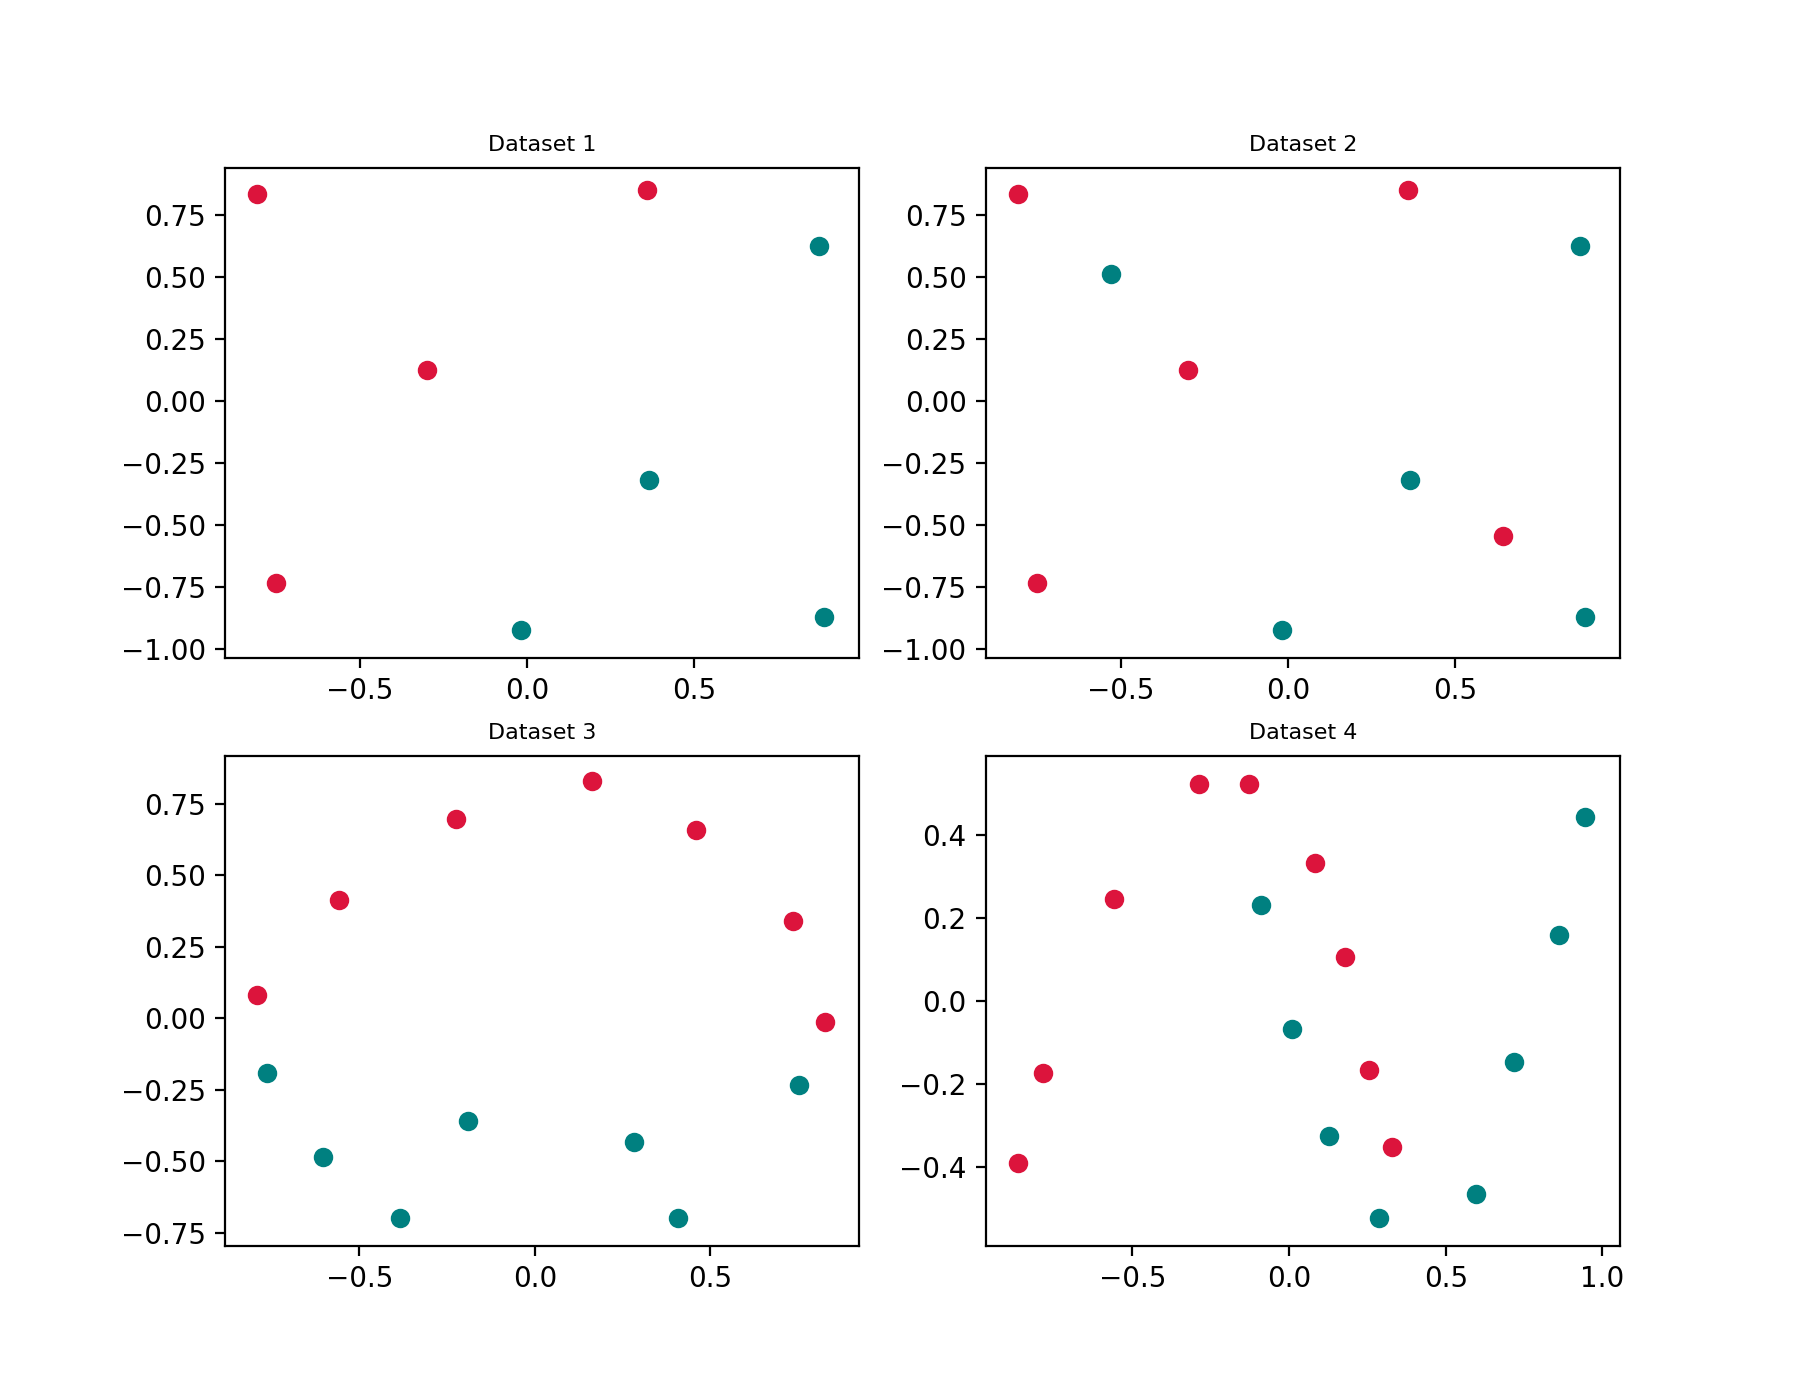

In [4]:
fig, Ax = plt.subplots(2, 2, figsize=(9,7))

Ax = Ax.ravel()
for ix, dset in enumerate(dsets):
    neg = dsets[dset]["neg_examples_nobias"]
    pos = dsets[dset]["pos_examples_nobias"]
    
    Ax[ix].set_title("Dataset {}".format(ix+1), fontsize=8)
    plot_points(neg, Ax[ix], c="crimson")
    plot_points(pos, Ax[ix], c="teal")

# Testing the Perceptron Class

In [5]:
neg_examples = dsets["ds_1"]["neg_examples_nobias"]
pos_examples = dsets["ds_1"]["pos_examples_nobias"]
initial_weights = dsets["ds_1"]["w_init"]

perc1 = Perceptron(neg_examples, pos_examples, initial_weights)

In [6]:
perc1.learn_perceptron()

At iteration 1
At iteration 2
At iteration 3
At iteration 4


True

In [9]:
perc1.pos_examples @ perc1.learned_weights

array([[ 0.39897438],
       [ 2.17701317],
       [ 1.57374532],
       [ 4.42226304]])

In [10]:
perc1.neg_examples @ perc1.learned_weights

array([[-4.57996364],
       [-1.55314609],
       [-0.25710764],
       [-1.35213061]])